### Import

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import tree
from sklearn import svm

import matplotlib.pyplot as plt
%matplotlib inline

### Read CSV File

In [3]:
df = pd.read_csv('answers.csv')
df.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,4.0,4.0,5.0,4.0,5.0,5.0,4.0,3.0,5.0,5.0,...,4.0,5.0,3.0,5.0,5.0,5.0,4.0,2.0,5.0,5.0
1,2.0,4.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,...,3.0,3.0,3.0,3.0,2.0,3.0,3.0,1.0,3.0,2.0
2,5.0,5.0,1.0,2.0,5.0,5.0,1.0,1.0,5.0,5.0,...,4.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,2.0,1.0,2.0,2.0,3.0,2.0,3.0,2.0,4.0,1.0,...,4.0,3.0,5.0,4.0,4.0,4.0,5.0,2.0,5.0,5.0
4,3.0,5.0,3.0,3.0,3.0,5.0,3.0,5.0,3.0,1.0,...,3.0,5.0,1.0,5.0,3.0,5.0,3.0,1.0,5.0,3.0


## Try Different Models

In [8]:
X = df.drop(df.columns[0:41],axis=1)
y = df['O1']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### Decision Tree

In [9]:
dt = tree.DecisionTreeRegressor()
dt = dt.fit(X_train, y_train)
dt_train = dt.score(X_train, y_train)
dt_test = dt.score(X_test, y_test)

In [10]:
dt_test # overfit

0.03995155900398373

In [11]:
dt_train

0.8462049925360418

### SVM

In [12]:
svm = svm.SVR()
svm = svm.fit(X_train, y_train)
svm_train = svm.score(X_train, y_train)
svm_test = svm.score(X_test, y_test)

In [13]:
svm_test

0.4188775788361916

In [14]:
svm_train

0.5042816933482043

### Nearest Neighbours

In [17]:
neighbours_train = []
neighbours_test = []

for i in range(1,20):
    knn = neighbors.KNeighborsRegressor(n_neighbors = i)
    knn = knn.fit(X_train, y_train)
    knn_train = knn.score(X_train, y_train)
    knn_test = knn.score(X_test, y_test)
    neighbours_train.append(knn_train)
    neighbours_test.append(knn_test)

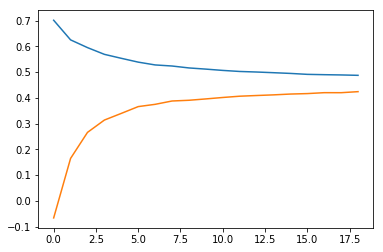

In [20]:
plt.plot(neighbours_train)
plt.plot(neighbours_test)